librerias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Carga de Dataset

In [19]:
data1 = pd.read_csv(r'C:\Users\User\OneDrive\Escritorio\UNAD\7 semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle\car data.csv')

Analisis de Dataset

In [20]:
print("Dataset 1:")
print(data1.head())


Dataset 1:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [21]:
print("Dataset 1:")
print(data1.info())

Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [22]:
print("Dataset 1:")
print(data1.describe())

Dataset 1:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


Ver nombre de columnas

In [27]:
print(train_data.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
Verificar las formas de los conjuntos de datos resultantes

In [23]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data1, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", train_data.shape)
print("Tamaño del conjunto de prueba:", test_data.shape)


Tamaño del conjunto de entrenamiento: (240, 9)
Tamaño del conjunto de prueba: (61, 9)


Definir características (features) y variable objetivo (target)
Eliminar la columna 'Selling_Price' para obtener las características
Seleccionar la columna 'Selling_Price' como la variable objetivo

In [36]:
train_features = train_data.drop('Selling_Price', axis=1)  
train_target = train_data['Selling_Price']

Calcula el error cuadrático medio (MSE)e
# Calcula el coeficiente de determinación (", r2)

In [37]:
test_target = test_data['Selling_Price']

In [41]:
test_features = test_data.drop(['Selling_Price', 'Car_Name'], axis=1)

codificacion one-hot

In [48]:
train_features_encoded = pd.get_dummies(train_features)
test_features_encoded = pd.get_dummies(test_features)

Entrenar modelo de regresion lineal

In [49]:
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(train_features_encoded, train_target)

LinearRegression()

In [51]:
combined_features = pd.concat([train_features, test_features])

In [53]:
combined_features_encoded = pd.get_dummies(combined_features)

se divide en test y prueba

In [55]:
train_features_encoded = combined_features_encoded[:len(train_features)]
test_features_encoded = combined_features_encoded[len(train_features):]

Entrenar modelo de regresion lineal

In [56]:
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(train_features_encoded, train_target)

LinearRegression()

In [57]:
predicciones = modelo_regresion_lineal.predict(test_features_encoded)

Grafica la línea de regresión

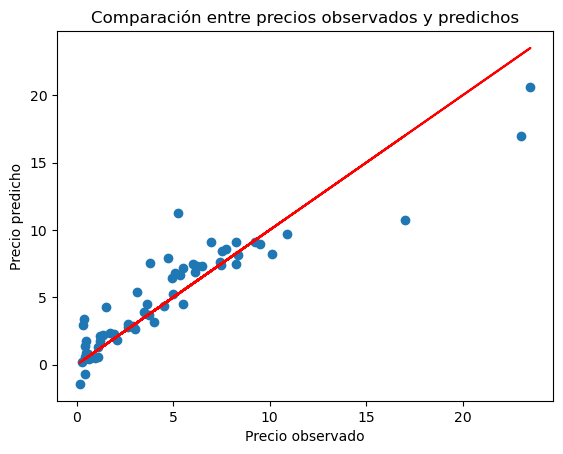

In [58]:
plt.scatter(test_target, predicciones)
plt.plot(test_target, test_target, color='red')  # Línea de regresión ideal (y = x)
plt.xlabel('Precio observado')
plt.ylabel('Precio predicho')
plt.title('Comparación entre precios observados y predichos')
plt.show()

Ver coeficiente del modelo

In [59]:
coeficientes = modelo_regresion_lineal.coef_
intercepto = modelo_regresion_lineal.intercept_
print("Coeficientes:")
for nombre, coef in zip(train_features_encoded.columns, coeficientes):
    print(nombre, ':', coef)
print("Intercepto:", intercepto)

Coeficientes:
Year : 0.3538013650978438
Present_Price : 0.4291525025123185
Kms_Driven : -6.157258662042864e-06
Owner : -0.9037598241780382
Fuel_Type_CNG : -1.090578936597123
Fuel_Type_Diesel : 1.4426936468461107
Fuel_Type_Petrol : -0.35211471024898744
Seller_Type_Dealer : 0.595296453077978
Seller_Type_Individual : -0.5952964530779786
Transmission_Automatic : 0.8195107769405763
Transmission_Manual : -0.819510776940577
Intercepto: -710.2771513345708
